In [1]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 879.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.32.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

In [3]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
4,[],Human coronavirus 229E,Human coronavirus 229E,12.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,12.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [4]:
selected_target = targets.target_chembl_id[8]
selected_target

'CHEMBL5118'

# **Replicase polyprotein 1ab (Severe acute respiratory syndrome-related coronavirus)**
Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.

Inhibits host translation by interacting with the 40S ribosomal subunit. The nsp1-40S ribosome complex further induces an endonucleolytic cleavage near the 5'UTR of host mRNAs, targeting them for degradation. Viral mRNAs are not susceptible to nsp1-mediated endonucleolytic RNA cleavage thanks to the presence of a 5'-end leader sequence and are therefore protected from degradation. By suppressing host gene expression, nsp1 facilitates efficient viral gene expression in infected cells and evasion from host immune response (PMID: 23035226).

Here, we will retrieve only bioactivity data for *Replicase polyprotein 1ab * (CHEMBL5118) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [5]:
activity= new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df.head(2)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0


In [8]:
df.to_csv('bioactivity_data_raw.csv',index=False)

In [9]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,None,None,18548176,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.3
211,None,None,18548177,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,5.5
212,None,None,18548178,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.1
213,None,None,18548179,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,3.2


## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [10]:
bioactivity_class= []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [11]:
df2.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]

In [13]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0
...,...,...,...
210,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0
211,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0
212,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0
213,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0


In [14]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3,bioactivity_class], axis=1)

In [15]:
df4 = df4[df.standard_value.notna()]
df4

<ipython-input-15-f7d51f1ce9ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df4[df.standard_value.notna()]


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
210,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate
211,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
212,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
213,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


In [16]:
df4.to_csv('bioactivity_data_preprocessed.csv',index=False)
! ls -l

total 144
-rw-r--r-- 1 root root  19302 Jan  6 12:21 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 119301 Jan  6 12:21 bioactivity_data_raw.csv
drwxr-xr-x 1 root root   4096 Jan  4 14:21 sample_data


In [17]:
#copying it to google drive
! cp bioactivity_data_preprocessed.csv "/content/gdrive/My Drive/Colab Notebooks/Computational drug discovery"
! ls "/content/gdrive/My Drive/Colab Notebooks/Computational drug discovery"

cp: cannot create regular file '/content/gdrive/My Drive/Colab Notebooks/Computational drug discovery': No such file or directory
ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/Computational drug discovery': No such file or directory


# **PART 2**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [19]:
import pandas as pd
df = pd.read_csv('bioactivity_data_preprocessed.csv')

In [20]:
import numpy as np
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.5 MB/s 


In [21]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [22]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [23]:
df_lipinski= lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,580.682,2.68582,3.0,8.0
1,547.653,1.39862,4.0,8.0
2,581.670,1.59522,4.0,8.0
3,659.781,0.87060,6.0,9.0
4,625.764,0.67400,6.0,9.0
...,...,...,...,...
209,668.767,-2.95720,4.0,10.0
210,524.659,2.51690,3.0,7.0
211,628.721,-1.81440,4.0,10.0
212,468.551,0.95810,3.0,7.0


# **Combining DataFrames**

In [24]:
df_combined = pd.concat([df,df_lipinski], axis= 1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive,580.682,2.68582,3.0,8.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive,547.653,1.39862,4.0,8.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive,581.670,1.59522,4.0,8.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive,659.781,0.87060,6.0,9.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive,625.764,0.67400,6.0,9.0
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate,668.767,-2.95720,4.0,10.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate,524.659,2.51690,3.0,7.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate,628.721,-1.81440,4.0,10.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate,468.551,0.95810,3.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [25]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [26]:
df_combined.standard_value.describe()

count       214.000000
mean      55138.037383
std       96554.024824
min         160.000000
25%        8900.000000
50%       28500.000000
75%       50000.000000
max      870000.000000
Name: standard_value, dtype: float64

In [27]:
-np.log10( (10**-9)* 100000000 )

1.0

In [28]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [29]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [30]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-29-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,10000.0
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,668.767,-2.95720,4.0,10.0,4300.0
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5500.0
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,628.721,-1.81440,4.0,10.0,4100.0
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,3200.0


In [31]:
df_final = pIC50(df_norm)
df_final

<ipython-input-25-0aeeb04fb2d3>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
209,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,668.767,-2.95720,4.0,10.0,5.366532
210,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5.259637
211,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,628.721,-1.81440,4.0,10.0,5.387216
212,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,5.494850


In [32]:
df_final.pIC50.describe()

count    214.000000
mean       4.635885
std        0.619425
min        3.060481
25%        4.301030
50%        4.545166
75%        5.050691
max        6.795880
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**

---


Here, we will be removing the ``intermediate`` class from our data set.

In [33]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
198,CHEMBL3818400,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C...,inactive,604.614,-4.32570,10.0,10.0,5.000000
200,CHEMBL3818000,CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C...,inactive,577.548,-6.97880,11.0,11.0,5.124939
203,CHEMBL4208240,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(...,inactive,600.667,-2.59460,4.0,10.0,5.292430
204,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608


## **Exploratory Data Analysis**

In [34]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

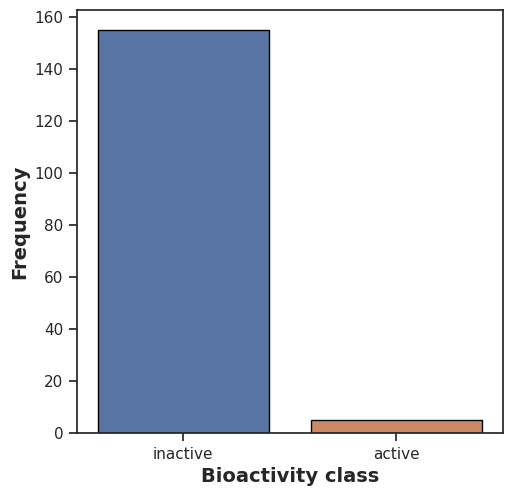

In [35]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data= df_2class, edgecolor= 'black')

plt.xlabel('Bioactivity class', fontsize = 14, fontweight='bold')
plt.ylabel('Frequency', fontsize = 14, fontweight='bold')

plt.savefig('plot_biactivity_class.pdf')

# **Scatter plot of MWolecular Weight versus LogP**
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

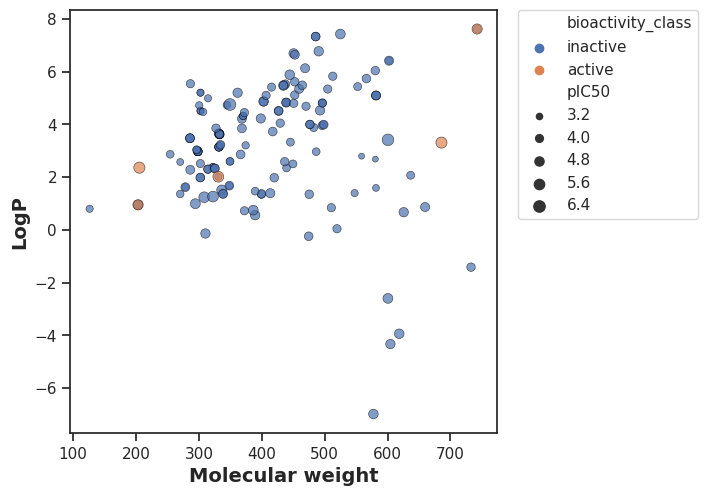

In [36]:
plt.figure(figsize=(5.5,5.5))
#sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

sns.scatterplot(x='MW', y= 'LogP', data = df_2class, hue= 'bioactivity_class', size= 'pIC50', edgecolor= 'black', alpha = 0.7)

plt.xlabel('Molecular weight', fontsize= 14, fontweight= 'bold')
plt.ylabel('LogP', fontsize= 14, fontweight= 'bold')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

# **Box Plot pIC50 value**

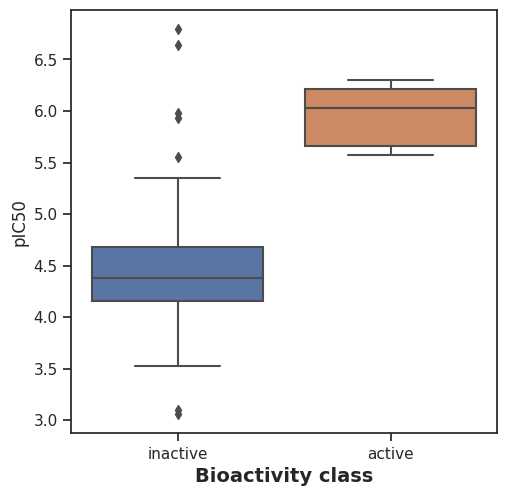

In [37]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x= 'bioactivity_class', y= 'pIC50', data= df_2class)

plt.xlabel('Bioactivity class', fontsize= 14, fontweight= 'bold')
plt.xlabel('Bioactivity class', fontsize= 14, fontweight= 'bold')

plt.savefig('plot_IC50.pdf')

**Statistical analysis | Mann-Whitney U Test**



In [38]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)
  return results

In [39]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,761.0,0.000246,0.05,Different distribution (reject H0)


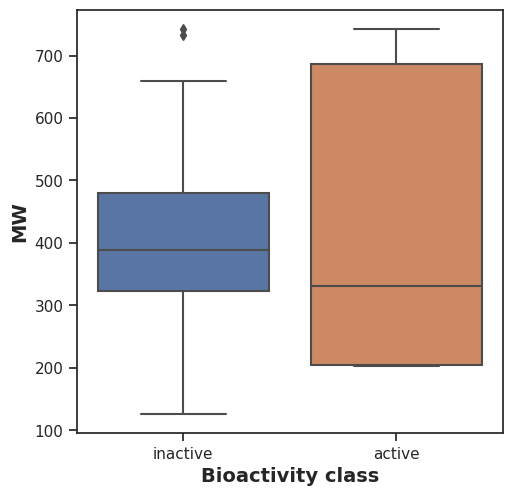

In [40]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x= 'bioactivity_class', y= 'MW', data= df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [41]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,356.0,0.761099,0.05,Same distribution (fail to reject H0)


#### **LogP**

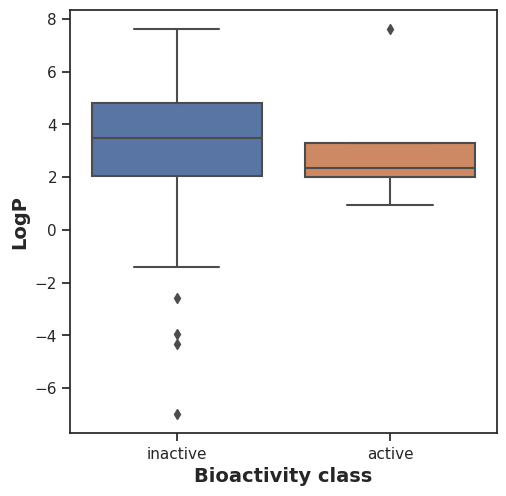

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,330.0,0.576137,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

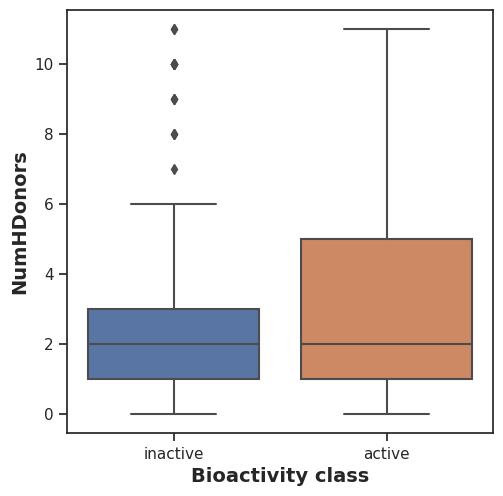

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [45]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,411.0,0.817534,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

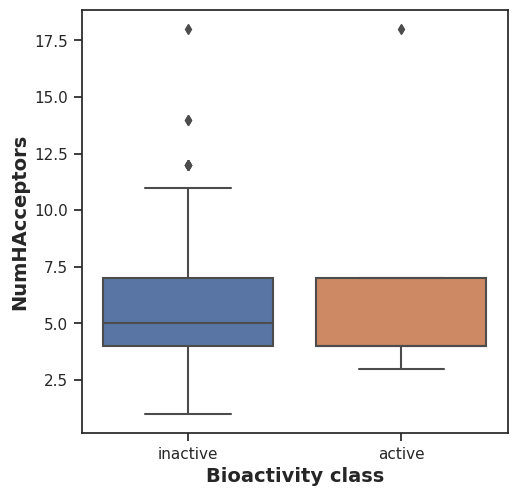

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [47]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,383.0,0.968251,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [48]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: bioactivity_data_preprocessed.csv (deflated 82%)
  adding: plot_biactivity_class.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_IC50.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: bioactivity_data_raw.csv (deflated 90%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 38%)
